# Analysis of Cardiovascular Dataset using different optimizers, models and learning rates

### Presentation By: Oishik Dasgupta
### Under the guidance of Dr. Mrinmay Maharaj

<img src="heart.JPG" width="400">

# Exploring and Processing the Data

### Dataset Link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [259]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [260]:
df = pd.read_csv('cardio_train.csv',sep=";")

In [261]:
df["age"]=np.floor(df["age"]/365)
df["height"]=np.round(df["height"]/100,2)
df['BMI'] =np.round(df['weight']/(df['height']*df['height']),2)
df['Pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Pulse_pressure
0,0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,21.97,30
1,1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,34.93,50
2,2,51.0,1,1.65,64.0,130,70,3,1,0,0,0,1,23.51,60
3,3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,28.71,50
4,4,47.0,1,1.56,56.0,100,60,1,1,0,0,0,0,23.01,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.0,2,1.68,76.0,120,80,1,1,1,0,1,0,26.93,40
69996,99995,61.0,1,1.58,126.0,140,90,2,2,0,0,1,1,50.47,50
69997,99996,52.0,2,1.83,105.0,180,90,3,1,0,1,0,1,31.35,90
69998,99998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1,27.10,55


In [262]:
df.isnull().sum()

id                0
age               0
gender            0
height            0
weight            0
ap_hi             0
ap_lo             0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
BMI               0
Pulse_pressure    0
dtype: int64

In [263]:
sum(df["Pulse_pressure"]<20)

1330

In [264]:
sum(df["ap_lo"]<40)

59

In [265]:
sum(df["ap_hi"]<80)

207

In [266]:
index_names = df[ (df["Pulse_pressure"]<20)].index
df.drop(index_names, inplace = True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Pulse_pressure
0,0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,21.97,30
1,1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,34.93,50
2,2,51.0,1,1.65,64.0,130,70,3,1,0,0,0,1,23.51,60
3,3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,28.71,50
4,4,47.0,1,1.56,56.0,100,60,1,1,0,0,0,0,23.01,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.0,2,1.68,76.0,120,80,1,1,1,0,1,0,26.93,40
69996,99995,61.0,1,1.58,126.0,140,90,2,2,0,0,1,1,50.47,50
69997,99996,52.0,2,1.83,105.0,180,90,3,1,0,1,0,1,31.35,90
69998,99998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1,27.10,55


In [267]:
index_names = df[ (df["ap_lo"]<40)].index
df.drop(index_names, inplace = True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Pulse_pressure
0,0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,21.97,30
1,1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,34.93,50
2,2,51.0,1,1.65,64.0,130,70,3,1,0,0,0,1,23.51,60
3,3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,28.71,50
4,4,47.0,1,1.56,56.0,100,60,1,1,0,0,0,0,23.01,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.0,2,1.68,76.0,120,80,1,1,1,0,1,0,26.93,40
69996,99995,61.0,1,1.58,126.0,140,90,2,2,0,0,1,1,50.47,50
69997,99996,52.0,2,1.83,105.0,180,90,3,1,0,1,0,1,31.35,90
69998,99998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1,27.10,55


In [268]:
index_names = df[ (df["ap_hi"]<80)].index
df.drop(index_names, inplace = True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Pulse_pressure
0,0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,21.97,30
1,1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,34.93,50
2,2,51.0,1,1.65,64.0,130,70,3,1,0,0,0,1,23.51,60
3,3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,28.71,50
4,4,47.0,1,1.56,56.0,100,60,1,1,0,0,0,0,23.01,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.0,2,1.68,76.0,120,80,1,1,1,0,1,0,26.93,40
69996,99995,61.0,1,1.58,126.0,140,90,2,2,0,0,1,1,50.47,50
69997,99996,52.0,2,1.83,105.0,180,90,3,1,0,1,0,1,31.35,90
69998,99998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1,27.10,55


In [269]:
index_names = df[ (df["ap_lo"]>200)].index
df.drop(index_names, inplace = True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Pulse_pressure
0,0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,21.97,30
1,1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,34.93,50
2,2,51.0,1,1.65,64.0,130,70,3,1,0,0,0,1,23.51,60
3,3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,28.71,50
4,4,47.0,1,1.56,56.0,100,60,1,1,0,0,0,0,23.01,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.0,2,1.68,76.0,120,80,1,1,1,0,1,0,26.93,40
69996,99995,61.0,1,1.58,126.0,140,90,2,2,0,0,1,1,50.47,50
69997,99996,52.0,2,1.83,105.0,180,90,3,1,0,1,0,1,31.35,90
69998,99998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1,27.10,55


In [270]:
index_names = df[ (df["ap_hi"]>200)].index
df.drop(index_names, inplace = True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Pulse_pressure
0,0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,21.97,30
1,1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,34.93,50
2,2,51.0,1,1.65,64.0,130,70,3,1,0,0,0,1,23.51,60
3,3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,28.71,50
4,4,47.0,1,1.56,56.0,100,60,1,1,0,0,0,0,23.01,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.0,2,1.68,76.0,120,80,1,1,1,0,1,0,26.93,40
69996,99995,61.0,1,1.58,126.0,140,90,2,2,0,0,1,1,50.47,50
69997,99996,52.0,2,1.83,105.0,180,90,3,1,0,1,0,1,31.35,90
69998,99998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1,27.10,55


In [271]:
card=df[["age","gender","height","weight","BMI","ap_hi","ap_lo","Pulse_pressure","cholesterol","gluc","smoke","alco","active","cardio"]]

In [272]:
card

,age,gender,height,weight,BMI,ap_hi,ap_lo,Pulse_pressure,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,1.68,62.0,21.97,110,80,30,1,1,0,0,1,0
1,55.0,1,1.56,85.0,34.93,140,90,50,3,1,0,0,1,1
2,51.0,1,1.65,64.0,23.51,130,70,60,3,1,0,0,0,1
3,48.0,2,1.69,82.0,28.71,150,100,50,1,1,0,0,1,1
4,47.0,1,1.56,56.0,23.01,100,60,40,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.0,2,1.68,76.0,26.93,120,80,40,1,1,1,0,1,0
69996,61.0,1,1.58,126.0,50.47,140,90,50,2,2,0,0,1,1
69997,52.0,2,1.83,105.0,31.35,180,90,90,3,1,0,1,0,1
69998,61.0,1,1.63,72.0,27.10,135,80,55,1,2,0,0,0,1


In [273]:
cardio0=sum(card["cardio"]==0)
cardio1=sum(card["cardio"]==1)
print("no. of observation in the dataset having cardiovascular diseases are: ",cardio1,"\nno. of observation in the dataset not having cardiovascular diseases are: ",cardio0)

no. of observation in the dataset having cardiovascular diseases are:  33897 
no. of observation in the dataset not having cardiovascular diseases are:  34628


The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:

In [274]:
dataset = card.values

In [275]:
dataset

array([[50.  ,  2.  ,  1.68, ...,  0.  ,  1.  ,  0.  ],
       [55.  ,  1.  ,  1.56, ...,  0.  ,  1.  ,  1.  ],
       [51.  ,  1.  ,  1.65, ...,  0.  ,  0.  ,  1.  ],
       ...,
       [52.  ,  2.  ,  1.83, ...,  1.  ,  0.  ,  1.  ],
       [61.  ,  1.  ,  1.63, ...,  0.  ,  0.  ,  1.  ],
       [56.  ,  1.  ,  1.7 , ...,  0.  ,  1.  ,  0.  ]])

Now, we split the dataset into our input features and the label we wish to predict.

In [276]:
X = dataset[:,0:13]
Y = dataset[:,13]

In [277]:
Y.shape

(68525,)

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [278]:
from sklearn import preprocessing

In [279]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [280]:
X_scale

array([[0.6       , 1.        , 0.57948718, ..., 0.        , 0.        ,
        1.        ],
       [0.74285714, 0.        , 0.51794872, ..., 0.        , 0.        ,
        1.        ],
       [0.62857143, 0.        , 0.56410256, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.65714286, 1.        , 0.65641026, ..., 0.        , 1.        ,
        0.        ],
       [0.91428571, 0.        , 0.55384615, ..., 0.        , 0.        ,
        0.        ],
       [0.77142857, 0.        , 0.58974359, ..., 0.        , 0.        ,
        1.        ]])

Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [281]:
from sklearn.model_selection import train_test_split

In [282]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [283]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [284]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(47967, 13) (10279, 13) (10279, 13) (47967,) (10279,) (10279,)


# Building and Training Our First Neural Network

We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use:

In [285]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 30 neurons, ReLU activation
- Hidden layer 2: 30 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [505]:
model = Sequential([
    Dense(13, activation='relu', input_shape=(13,)),
    Dense(28, activation='relu'),
    Dense(28, activation='relu'),    
    Dense(1, activation='sigmoid'),
])

In [506]:
model.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 13)                182       
_________________________________________________________________
dense_192 (Dense)            (None, 28)                392       
_________________________________________________________________
dense_193 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_194 (Dense)            (None, 1)                 29        
Total params: 1,415
Trainable params: 1,415
Non-trainable params: 0
_________________________________________________________________


<img src="model.JPG" width="600">

Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

# OPTIMIZER : SGD

I tried different optimizers:<br>
i) SGD <br>

Originally we are using Mini-Batch gradient descent here. Mini-Batch gradient decent integrates the advantages of batch gradient decent and stochastic gradient decent, and update the parameters after obtaining the gradient of a mini-batch of samples:
$$x_{k+1} = x_{k} − t_{k}∆f(x_{k})^{(i:i+m)}$$
where the mini-batch size is m.<br>
Mini-batch gradient decent can not guarantee good convergence, and the tuning of step size also need some experience. Therefore some researchers extend it with some more useful tricks and techniques to improve the convergence which we will see. For convenience, people also call mini-batch gradient decent as SGD.

## Vanilla SGD with low learning rate

In [518]:
model = Sequential([
    Dense(13, activation='relu', input_shape=(13,)),
    Dense(28, activation='relu'),
    Dense(28, activation='relu'),
    Dense(1, activation='sigmoid'),
])
sgd = tf.keras.optimizers.SGD(learning_rate= 0.0001)

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch 
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [519]:
model.compile(optimizer = "sgd",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [520]:
hist = model.fit(X_train, Y_train,
          batch_size=70, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
686/686 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.5097 - val_loss: 0.6896 - val_accuracy: 0.5622
Epoch 2/100
686/686 [==============================] - 1s 862us/step - loss: 0.6889 - accuracy: 0.5583 - val_loss: 0.6835 - val_accuracy: 0.5897
Epoch 3/100
686/686 [==============================] - 1s 1ms/step - loss: 0.6821 - accuracy: 0.5886 - val_loss: 0.6735 - val_accuracy: 0.5986
Epoch 4/100
686/686 [==============================] - 1s 821us/step - loss: 0.6703 - accuracy: 0.6078 - val_loss: 0.6525 - val_accuracy: 0.6498
Epoch 5/100
686/686 [==============================] - 1s 832us/step - loss: 0.6461 - accuracy: 0.6536 - val_loss: 0.6177 - val_accuracy: 0.6924
Epoch 6/100
686/686 [==============================] - 1s 813us/step - loss: 0.6114 - accuracy: 0.6867 - val_loss: 0.5855 - val_accuracy: 0.6987
Epoch 7/100
686/686 [==============================] - 1s 747us/step - loss: 0.5826 - accuracy: 0.7044 - val_loss: 0.5660 - val_accura

686/686 [==============================] - 1s 748us/step - loss: 0.5421 - accuracy: 0.7353 - val_loss: 0.5458 - val_accuracy: 0.7331
Epoch 58/100
686/686 [==============================] - 0s 693us/step - loss: 0.5491 - accuracy: 0.7303 - val_loss: 0.5450 - val_accuracy: 0.7326
Epoch 59/100
686/686 [==============================] - 1s 731us/step - loss: 0.5437 - accuracy: 0.7357 - val_loss: 0.5447 - val_accuracy: 0.7316
Epoch 60/100
686/686 [==============================] - 1s 805us/step - loss: 0.5441 - accuracy: 0.7330 - val_loss: 0.5497 - val_accuracy: 0.7316
Epoch 61/100
686/686 [==============================] - 1s 969us/step - loss: 0.5460 - accuracy: 0.7312 - val_loss: 0.5486 - val_accuracy: 0.7323
Epoch 62/100
686/686 [==============================] - 1s 969us/step - loss: 0.5450 - accuracy: 0.7322 - val_loss: 0.5448 - val_accuracy: 0.7336
Epoch 63/100
686/686 [==============================] - 1s 975us/step - loss: 0.5423 - accuracy: 0.7346 - val_loss: 0.5444 - val_accuracy

Evaluating our data on the test set

In [521]:
model.evaluate(X_test, Y_test)[1]

322/322 [==============================] - 0s 511us/step - loss: 0.5449 - accuracy: 0.7337


0.7337289452552795

## Visualizing Loss and Accuracy of SGD

In [522]:
def gradient(model, x):
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    with tf.GradientTape() as t:
        t.watch(x_tensor)
        loss = model(x_tensor)
    return t.gradient(loss, x_tensor).numpy()
l = gradient(model , X_train)

Text(0.5, 1.0, 'Density curve of norm of gradients from sgd')

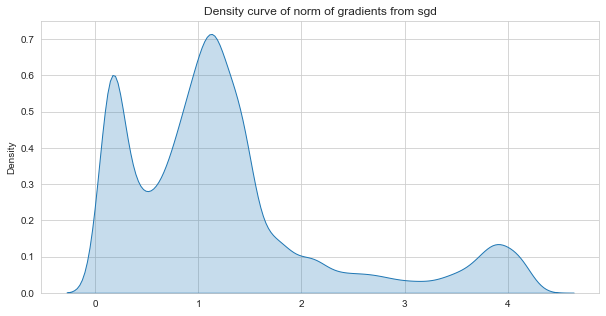

In [523]:
grad = []
for i in l :
  
  grad.append(np.linalg.norm(i))
plt.figure(figsize= (10,5))
sns.kdeplot(grad , fill=True )
plt.title("Density curve of norm of gradients from sgd")

We want to visualize the training loss and the validation loss like this:

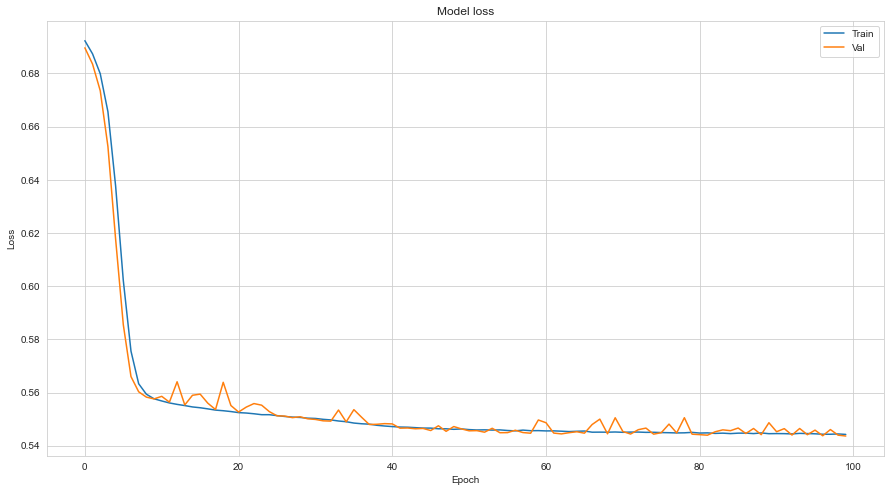

In [524]:
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

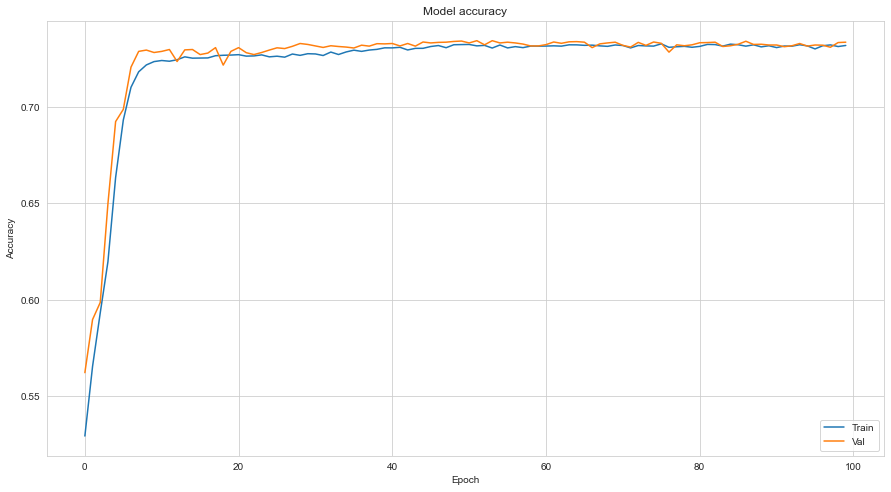

In [525]:
plt.figure(figsize=(15,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Vanilla SGD with intermediate learning rate

In [529]:
sgd = tf.keras.optimizers.SGD(learning_rate= 0.01)
model = Sequential([
    Dense(13, activation='relu', input_shape=(13,)),
    Dense(28, activation='relu'),
    Dense(28, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [530]:
model.compile(optimizer = "sgd",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [531]:
hist = model.fit(X_train, Y_train,
          batch_size=70, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
686/686 [==============================] - 1s 1ms/step - loss: 0.6894 - accuracy: 0.5253 - val_loss: 0.6825 - val_accuracy: 0.5767
Epoch 2/100
686/686 [==============================] - 1s 834us/step - loss: 0.6804 - accuracy: 0.5940 - val_loss: 0.6675 - val_accuracy: 0.6325
Epoch 3/100
686/686 [==============================] - 1s 857us/step - loss: 0.6621 - accuracy: 0.6413 - val_loss: 0.6375 - val_accuracy: 0.6884
Epoch 4/100
686/686 [==============================] - 1s 810us/step - loss: 0.6278 - accuracy: 0.6846 - val_loss: 0.6024 - val_accuracy: 0.6881
Epoch 5/100
686/686 [==============================] - 1s 829us/step - loss: 0.5951 - accuracy: 0.7025 - val_loss: 0.5770 - val_accuracy: 0.7145
Epoch 6/100
686/686 [==============================] - 1s 802us/step - loss: 0.5713 - accuracy: 0.7175 - val_loss: 0.5672 - val_accuracy: 0.7249
Epoch 7/100
686/686 [==============================] - 1s 780us/step - loss: 0.5591 - accuracy: 0.7250 - val_loss: 0.5594 - val_accu

686/686 [==============================] - 1s 784us/step - loss: 0.5442 - accuracy: 0.7328 - val_loss: 0.5479 - val_accuracy: 0.7303
Epoch 58/100
686/686 [==============================] - 1s 824us/step - loss: 0.5452 - accuracy: 0.7325 - val_loss: 0.5478 - val_accuracy: 0.7318
Epoch 59/100
686/686 [==============================] - 1s 767us/step - loss: 0.5441 - accuracy: 0.7320 - val_loss: 0.5475 - val_accuracy: 0.7323
Epoch 60/100
686/686 [==============================] - 1s 776us/step - loss: 0.5466 - accuracy: 0.7289 - val_loss: 0.5470 - val_accuracy: 0.7323
Epoch 61/100
686/686 [==============================] - 1s 727us/step - loss: 0.5470 - accuracy: 0.7341 - val_loss: 0.5511 - val_accuracy: 0.7326
Epoch 62/100
686/686 [==============================] - 1s 728us/step - loss: 0.5489 - accuracy: 0.7294 - val_loss: 0.5478 - val_accuracy: 0.7331
Epoch 63/100
686/686 [==============================] - 1s 762us/step - loss: 0.5438 - accuracy: 0.7338 - val_loss: 0.5487 - val_accuracy

Evaluating our data on the test set:

In [532]:
model.evaluate(X_test, Y_test)[1]

322/322 [==============================] - 0s 528us/step - loss: 0.5426 - accuracy: 0.7314


0.7313941121101379

## Visualizing Loss and Accuracy of SGD

In [533]:
def gradient(model, x):
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    with tf.GradientTape() as t:
        t.watch(x_tensor)
        loss = model(x_tensor)
    return t.gradient(loss, x_tensor).numpy()
l = gradient(model , X_train)

Text(0.5, 1.0, 'Density curve of norm of gradients from sgd')

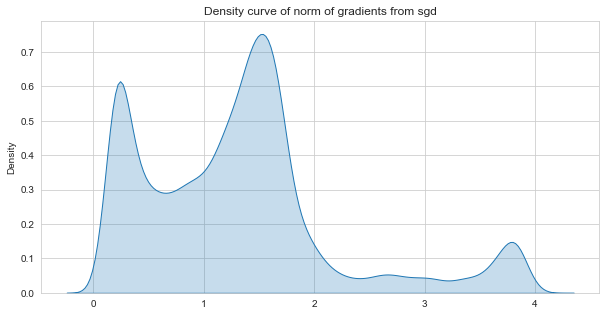

In [534]:
grad = []
for i in l :
  
  grad.append(np.linalg.norm(i))
plt.figure(figsize= (10,5))
sns.kdeplot(grad , fill=True )
plt.title("Density curve of norm of gradients from sgd")

We want to visualize the training loss and the validation loss like this:

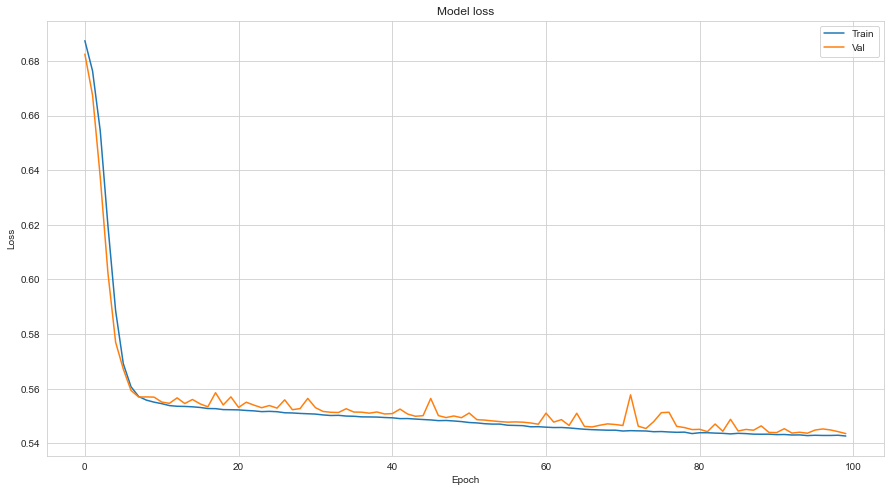

In [535]:
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

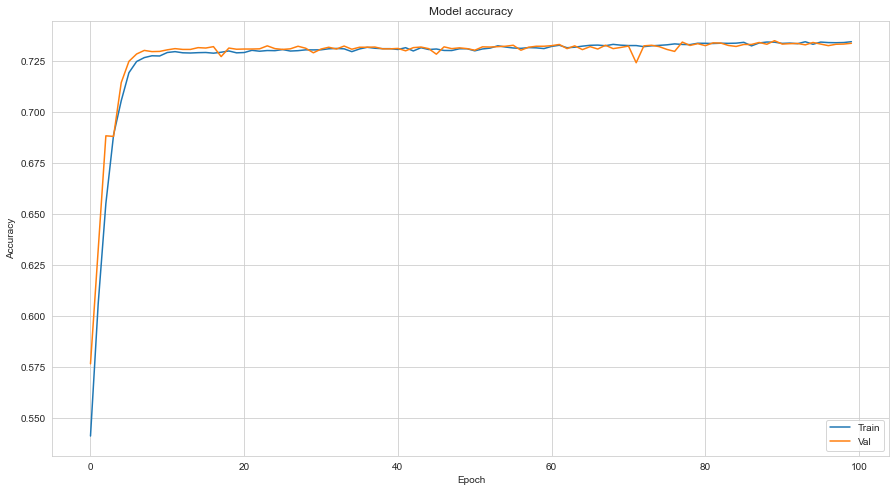

In [536]:
plt.figure(figsize=(15,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Vanilla SGD with high learning rate

In [537]:
sgd = tf.keras.optimizers.SGD(learning_rate= 0.1)
model = Sequential([
    Dense(13, activation='relu', input_shape=(13,)),
    Dense(28, activation='relu'),
    Dense(28, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [538]:
model.compile(optimizer = "sgd",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [539]:
hist = model.fit(X_train, Y_train,
          batch_size=70, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
686/686 [==============================] - 5s 5ms/step - loss: 0.6890 - accuracy: 0.5115 - val_loss: 0.6762 - val_accuracy: 0.6744
Epoch 2/100
686/686 [==============================] - 1s 886us/step - loss: 0.6704 - accuracy: 0.6719 - val_loss: 0.6463 - val_accuracy: 0.6869
Epoch 3/100
686/686 [==============================] - 1s 1ms/step - loss: 0.6373 - accuracy: 0.6794 - val_loss: 0.6123 - val_accuracy: 0.6847
Epoch 4/100
686/686 [==============================] - 1s 921us/step - loss: 0.6059 - accuracy: 0.6936 - val_loss: 0.5852 - val_accuracy: 0.7075
Epoch 5/100
686/686 [==============================] - 1s 953us/step - loss: 0.5794 - accuracy: 0.7148 - val_loss: 0.5676 - val_accuracy: 0.7250
Epoch 6/100
686/686 [==============================] - 1s 921us/step - loss: 0.5628 - accuracy: 0.7226 - val_loss: 0.5590 - val_accuracy: 0.7295
Epoch 7/100
686/686 [==============================] - 1s 988us/step - loss: 0.5604 - accuracy: 0.7240 - val_loss: 0.5565 - val_accura

686/686 [==============================] - 1s 748us/step - loss: 0.5452 - accuracy: 0.7297 - val_loss: 0.5480 - val_accuracy: 0.7308
Epoch 58/100
686/686 [==============================] - 1s 780us/step - loss: 0.5433 - accuracy: 0.7336 - val_loss: 0.5489 - val_accuracy: 0.7330
Epoch 59/100
686/686 [==============================] - 1s 781us/step - loss: 0.5468 - accuracy: 0.7309 - val_loss: 0.5487 - val_accuracy: 0.7326
Epoch 60/100
686/686 [==============================] - 1s 798us/step - loss: 0.5443 - accuracy: 0.7328 - val_loss: 0.5494 - val_accuracy: 0.7338
Epoch 61/100
686/686 [==============================] - 1s 756us/step - loss: 0.5425 - accuracy: 0.7357 - val_loss: 0.5473 - val_accuracy: 0.7324
Epoch 62/100
686/686 [==============================] - 1s 778us/step - loss: 0.5485 - accuracy: 0.7282 - val_loss: 0.5500 - val_accuracy: 0.7318
Epoch 63/100
686/686 [==============================] - 1s 770us/step - loss: 0.5473 - accuracy: 0.7315 - val_loss: 0.5503 - val_accuracy

Evaluating our data on the test set:

In [540]:
model.evaluate(X_test, Y_test)[1]

322/322 [==============================] - 0s 506us/step - loss: 0.5441 - accuracy: 0.7327


0.7326588034629822

## Visualizing Loss and Accuracy of SGD

In [541]:
def gradient(model, x):
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    with tf.GradientTape() as t:
        t.watch(x_tensor)
        loss = model(x_tensor)
    return t.gradient(loss, x_tensor).numpy()
l = gradient(model , X_train)

Text(0.5, 1.0, 'Density curve of norm of gradients from sgd')

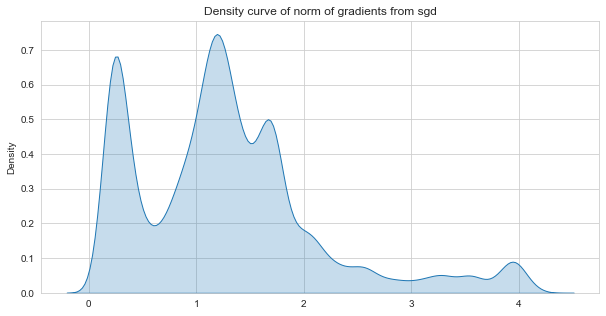

In [542]:
grad = []
for i in l :
  
  grad.append(np.linalg.norm(i))
plt.figure(figsize= (10,5))
sns.kdeplot(grad , fill=True )
plt.title("Density curve of norm of gradients from sgd")

We want to visualize the training loss and the validation loss like this:

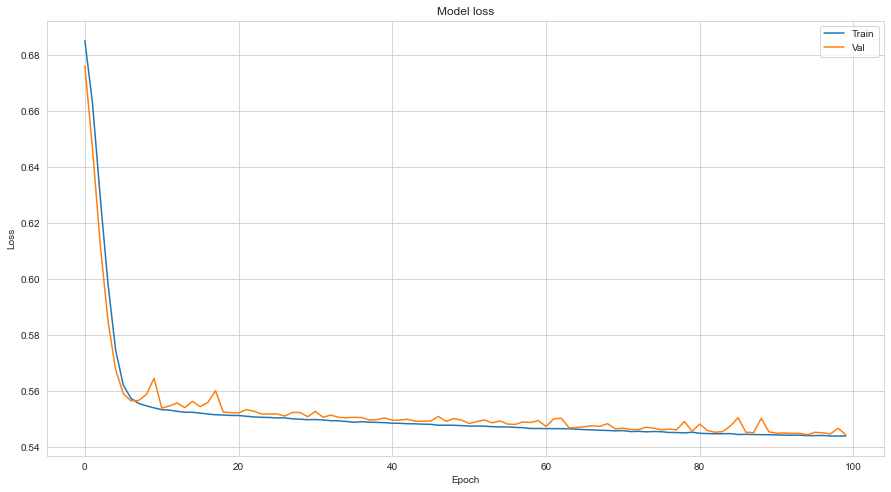

In [543]:
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

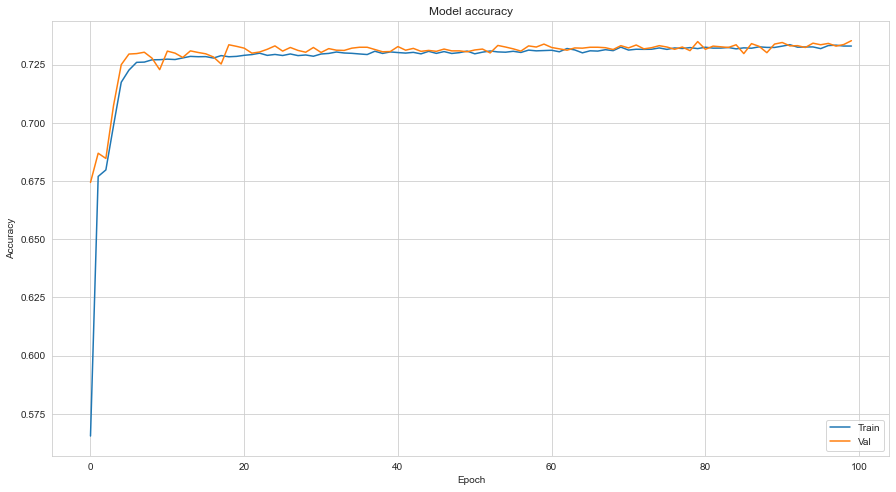

In [544]:
plt.figure(figsize=(15,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## SGD with momentum
If there is a long shallow ravine with steep walls on the direction to the optimal point, then the standard SGD will tend to oscillate across the narrow ravine. Momentum is one of the mechanism which is used to fix the direction:
$$v_{k} = mv_{k−1} + t_{k}∆f(x_{k}) ;\;\;\; x_{k+1} = x_{k} − v_{k}$$

where m ∈ (0, 1] determines for how many iterations the previous gradients are incorporated into the current update. Generally m is set to 0.5 until the initial learning stabilizes and then is increased to 0.9 or higher.

In [545]:
sgd = tf.keras.optimizers.SGD(learning_rate= 0.01,momentum=0.91)
model = Sequential([
    Dense(13, activation='relu', input_shape=(13,)),
    Dense(28, activation='relu'),
    Dense(28, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [546]:
model.compile(optimizer = "sgd",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [547]:
hist = model.fit(X_train, Y_train,
          batch_size=70, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
686/686 [==============================] - 1s 1ms/step - loss: 0.7014 - accuracy: 0.4621 - val_loss: 0.6917 - val_accuracy: 0.5762
Epoch 2/100
686/686 [==============================] - 1s 844us/step - loss: 0.6907 - accuracy: 0.5914 - val_loss: 0.6869 - val_accuracy: 0.5968
Epoch 3/100
686/686 [==============================] - 1s 852us/step - loss: 0.6852 - accuracy: 0.6062 - val_loss: 0.6790 - val_accuracy: 0.6749
Epoch 4/100
686/686 [==============================] - 1s 927us/step - loss: 0.6757 - accuracy: 0.6569 - val_loss: 0.6593 - val_accuracy: 0.6873
Epoch 5/100
686/686 [==============================] - 1s 850us/step - loss: 0.6512 - accuracy: 0.6865 - val_loss: 0.6215 - val_accuracy: 0.6982
Epoch 6/100
686/686 [==============================] - 1s 824us/step - loss: 0.6123 - accuracy: 0.7008 - val_loss: 0.5858 - val_accuracy: 0.7066
Epoch 7/100
686/686 [==============================] - 1s 877us/step - loss: 0.5787 - accuracy: 0.7170 - val_loss: 0.5677 - val_accu

686/686 [==============================] - 1s 808us/step - loss: 0.5484 - accuracy: 0.7331 - val_loss: 0.5511 - val_accuracy: 0.7310
Epoch 58/100
686/686 [==============================] - 1s 756us/step - loss: 0.5466 - accuracy: 0.7313 - val_loss: 0.5514 - val_accuracy: 0.7300
Epoch 59/100
686/686 [==============================] - 1s 751us/step - loss: 0.5491 - accuracy: 0.7302 - val_loss: 0.5501 - val_accuracy: 0.7312
Epoch 60/100
686/686 [==============================] - 1s 767us/step - loss: 0.5503 - accuracy: 0.7289 - val_loss: 0.5517 - val_accuracy: 0.7294
Epoch 61/100
686/686 [==============================] - 0s 712us/step - loss: 0.5498 - accuracy: 0.7307 - val_loss: 0.5501 - val_accuracy: 0.7312
Epoch 62/100
686/686 [==============================] - 1s 782us/step - loss: 0.5447 - accuracy: 0.7325 - val_loss: 0.5504 - val_accuracy: 0.7311
Epoch 63/100
686/686 [==============================] - 1s 778us/step - loss: 0.5454 - accuracy: 0.7333 - val_loss: 0.5501 - val_accuracy

Evaluating our data on the test set:

In [548]:
model.evaluate(X_test, Y_test)[1]

322/322 [==============================] - 0s 492us/step - loss: 0.5448 - accuracy: 0.7335


0.7335343956947327

## Visualizing Loss and Accuracy of SGD with momentum

In [549]:
def gradient(model, x):
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    with tf.GradientTape() as t:
        t.watch(x_tensor)
        loss = model(x_tensor)
    return t.gradient(loss, x_tensor).numpy()
l = gradient(model , X_train)

Text(0.5, 1.0, 'Density curve of norm of gradients from sgd')

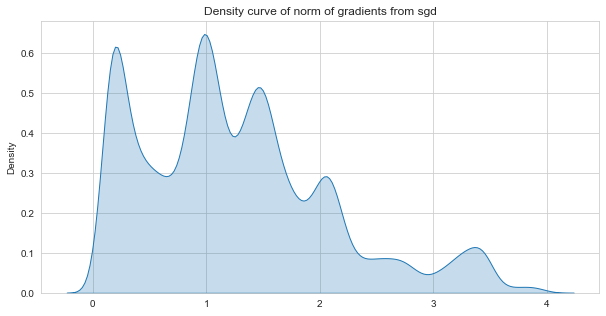

In [550]:
grad = []
for i in l :
  
  grad.append(np.linalg.norm(i))
plt.figure(figsize= (10,5))
sns.kdeplot(grad , fill=True )
plt.title("Density curve of norm of gradients from sgd")

We want to visualize the training loss and the validation loss like this:

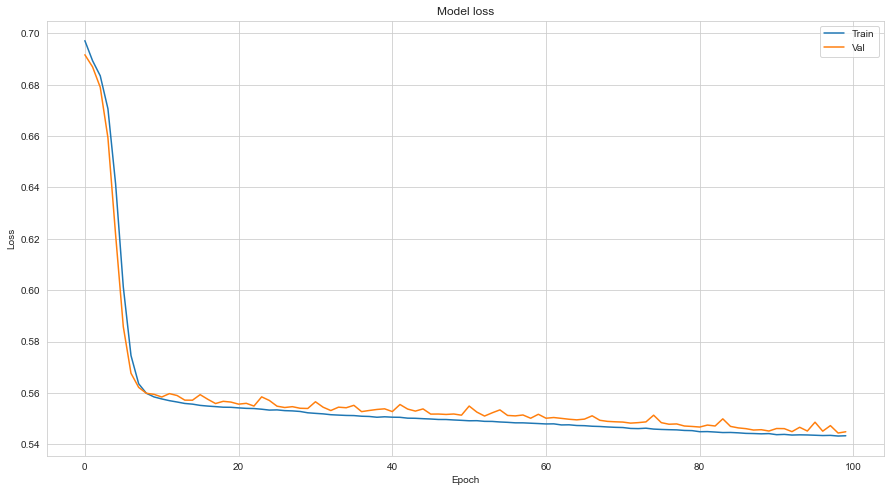

In [551]:
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

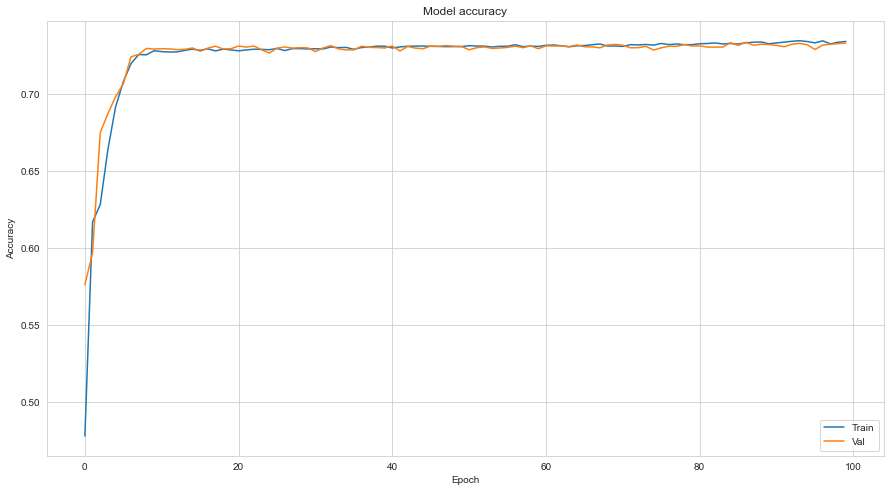

In [552]:
plt.figure(figsize=(15,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# OPTIMIZER : RMSprop

RMSprop <br>

RMSprop is proposed to tackle the problem of step size vanishing of Adagrad. It employs the decaying average of the history gradients:

$$E[∆f(x)^{2}]_{k} = ρE[∆f(x)^{2}]_{k−1} + (1 − ρ)∆f(x_{k})^{2} $$
$$ $$
$$x_{k+1} = x_{k} − \frac{t}{\sqrt{E[∆f(x)2]_{k} + ε}}∆f(x_{k})$$

where ρ is a decay constant (e.g., 0.9).

In [555]:
rms = tf.keras.optimizers.RMSprop(
    learning_rate=0.01,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
)

In [556]:
model3 = Sequential([
    Dense(13, activation='relu', input_shape=(13,)),
    Dense(28, activation='relu'),
    Dense(28, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model3.compile(optimizer = "RMSprop",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [557]:
hist = model3.fit(X_train, Y_train,
          batch_size=70, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
686/686 [==============================] - 2s 1ms/step - loss: 0.6478 - accuracy: 0.6204 - val_loss: 0.5633 - val_accuracy: 0.7265
Epoch 2/100
686/686 [==============================] - 1s 892us/step - loss: 0.5619 - accuracy: 0.7220 - val_loss: 0.5551 - val_accuracy: 0.7300
Epoch 3/100
686/686 [==============================] - 1s 877us/step - loss: 0.5586 - accuracy: 0.7243 - val_loss: 0.5568 - val_accuracy: 0.7283
Epoch 4/100
686/686 [==============================] - 1s 931us/step - loss: 0.5514 - accuracy: 0.7299 - val_loss: 0.5612 - val_accuracy: 0.7187
Epoch 5/100
686/686 [==============================] - 1s 889us/step - loss: 0.5478 - accuracy: 0.7335 - val_loss: 0.5478 - val_accuracy: 0.7318
Epoch 6/100
686/686 [==============================] - 1s 872us/step - loss: 0.5497 - accuracy: 0.7281 - val_loss: 0.5493 - val_accuracy: 0.7331
Epoch 7/100
686/686 [==============================] - 1s 899us/step - loss: 0.5440 - accuracy: 0.7336 - val_loss: 0.5469 - val_accu

686/686 [==============================] - 1s 832us/step - loss: 0.5418 - accuracy: 0.7339 - val_loss: 0.5551 - val_accuracy: 0.7248
Epoch 58/100
686/686 [==============================] - 1s 851us/step - loss: 0.5410 - accuracy: 0.7350 - val_loss: 0.5434 - val_accuracy: 0.7346
Epoch 59/100
686/686 [==============================] - 1s 864us/step - loss: 0.5421 - accuracy: 0.7340 - val_loss: 0.5444 - val_accuracy: 0.7334
Epoch 60/100
686/686 [==============================] - 1s 830us/step - loss: 0.5398 - accuracy: 0.7372 - val_loss: 0.5479 - val_accuracy: 0.7326
Epoch 61/100
686/686 [==============================] - 1s 865us/step - loss: 0.5447 - accuracy: 0.7330 - val_loss: 0.5507 - val_accuracy: 0.7267
Epoch 62/100
686/686 [==============================] - 1s 803us/step - loss: 0.5422 - accuracy: 0.7352 - val_loss: 0.5464 - val_accuracy: 0.7335
Epoch 63/100
686/686 [==============================] - 1s 899us/step - loss: 0.5384 - accuracy: 0.7389 - val_loss: 0.5478 - val_accuracy

In [558]:
model3.evaluate(X_test, Y_test)[1]

322/322 [==============================] - 0s 518us/step - loss: 0.5475 - accuracy: 0.7326


0.7325615286827087

# Visualizing Loss and Accuracy of RMSprop

Text(0.5, 1.0, 'Density curve of norm of gradients from RMSprop')

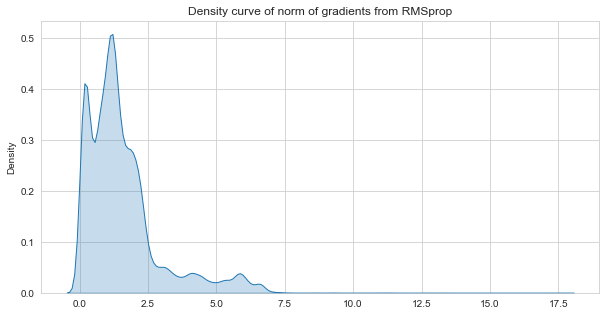

In [559]:
def gradient(model, x):
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    with tf.GradientTape() as t:
        t.watch(x_tensor)
        loss = model(x_tensor)
    return t.gradient(loss, x_tensor).numpy()
l = gradient(model3 , X_train)
grad = []
for i in l :
  
  grad.append(np.linalg.norm(i))
plt.figure(figsize= (10,5))
sns.kdeplot(grad , fill=True )
plt.title("Density curve of norm of gradients from RMSprop")

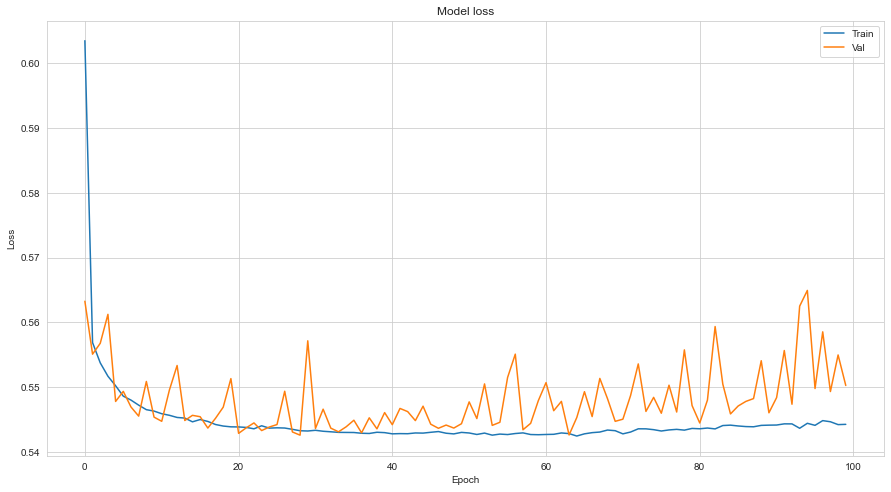

In [560]:
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

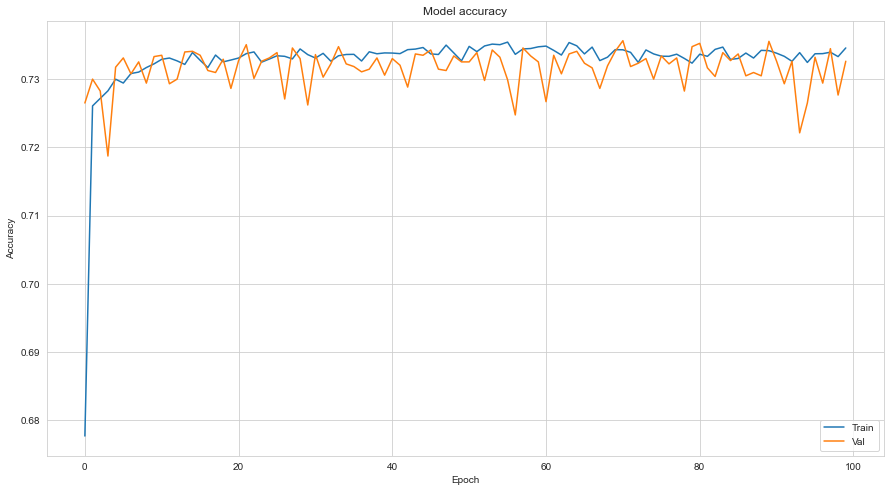

In [561]:
plt.figure(figsize=(15,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# OPTIMIZER : Adam
Adam optimization algorithm is an extension to stochastic gradient descent. It was presented in 2015.The name **Adam** is derived from **Adaptive moment estimation**.The authors describe Adam as combining the advantages of SGD with momentum and RMSprop.

Adam is another method that computes adaptive step size for each parameter. It uses both the decaying average of history gradients and their squared values. Adam update rule consists of the
following steps:

$$m_{k} = β_{1}m_{k−1} + (1 − β_{1})∆f(x_{k})$$
$$v_{k} = β_{2}v_{k−1} + (1 − β_{2})∆f(x_{k})^{2}$$
$$mˆ_{k} = \frac{m_{k}}{1 − β_{k}^{1}} ;\;\; vˆ_{k} = \frac{v_{k}}{1 − β_{k}^{2}}$$
$$x_{k+1} = x_{k} − \frac{t}{\sqrt{vˆ_{k} + ε}}mˆ_{k}$$

where β1 can be 0.9, β2 can be 0.999, and ε can be 1e − 8.

Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).

In [562]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-07, 
    amsgrad=False,
    name="adam",
)
model2 = Sequential([
    Dense(13, activation='relu', input_shape=(13,)),
    Dense(28, activation='relu'),
    Dense(28, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model2.fit(X_train, Y_train,
          batch_size=70, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
686/686 [==============================] - 2s 1ms/step - loss: 0.6307 - accuracy: 0.6388 - val_loss: 0.5652 - val_accuracy: 0.7237
Epoch 2/50
686/686 [==============================] - 1s 1ms/step - loss: 0.5582 - accuracy: 0.7236 - val_loss: 0.5552 - val_accuracy: 0.7312
Epoch 3/50
686/686 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7291 - val_loss: 0.5549 - val_accuracy: 0.7282
Epoch 4/50
686/686 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7267 - val_loss: 0.5498 - val_accuracy: 0.7331
Epoch 5/50
686/686 [==============================] - 1s 941us/step - loss: 0.5563 - accuracy: 0.7227 - val_loss: 0.5494 - val_accuracy: 0.7307
Epoch 6/50
686/686 [==============================] - 1s 887us/step - loss: 0.5486 - accuracy: 0.7323 - val_loss: 0.5502 - val_accuracy: 0.7324
Epoch 7/50
686/686 [==============================] - 1s 927us/step - loss: 0.5470 - accuracy: 0.7303 - val_loss: 0.5522 - val_accuracy: 0.7303


Let's do the same visualization to see what overfitting looks like in terms of the loss and accuracy.

In [563]:
model2.evaluate(X_test, Y_test)[1]

322/322 [==============================] - 0s 464us/step - loss: 0.5416 - accuracy: 0.7296


0.7296429872512817

Text(0.5, 1.0, 'Density curve of norm of gradients from Adam')

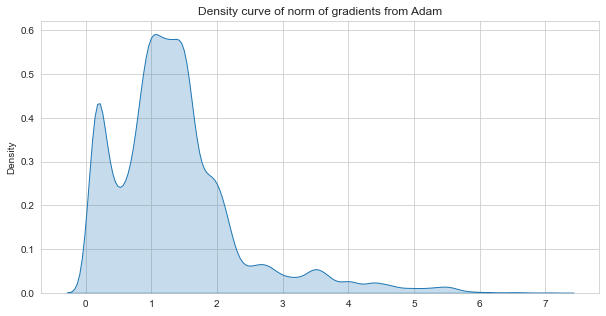

In [564]:
def gradient(model, x):
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    with tf.GradientTape() as t:
        t.watch(x_tensor)
        loss = model(x_tensor)
    return t.gradient(loss, x_tensor).numpy()
l = gradient(model2 , X_train)
grad = []
for i in l :
  
  grad.append(np.linalg.norm(i))
plt.figure(figsize= (10,5))
sns.kdeplot(grad , fill=True )
plt.title("Density curve of norm of gradients from Adam")

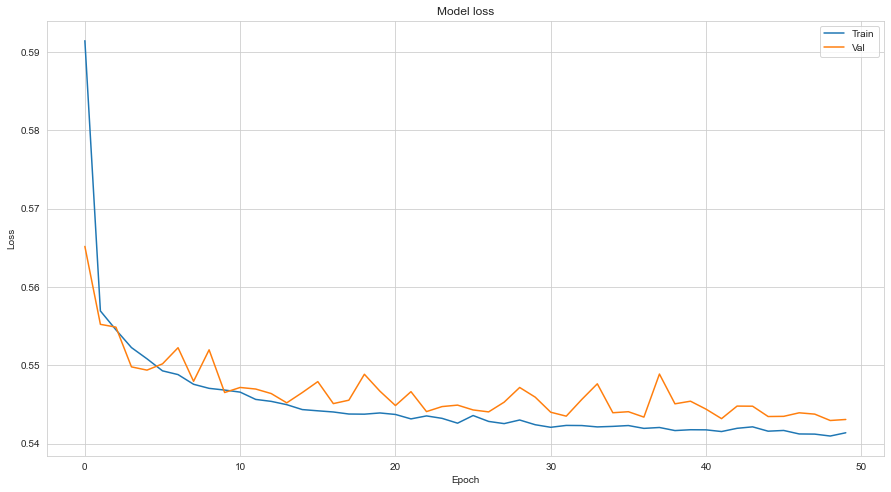

In [565]:
plt.figure(figsize=(15,8))
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

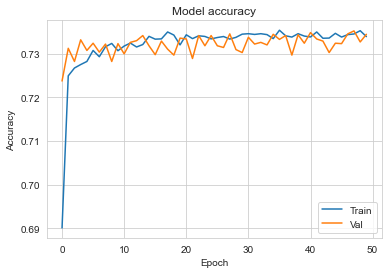

In [566]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## CONCLUSION:
Vanilla SGD with a learning rate of 0.01 is enough for this training of cardiovascular dataset. We donot need RMSprop or Adam.